In [1]:
#!pip install -U finance-datareader

In [3]:
import pandas as pd
#import seaborn as sns
import FinanceDataReader as fdr
fdr.__version__

'0.9.33'

In [4]:
fdr.StockListing?

Signature: fdr.StockListing(market)
Docstring:
read stock list of stock exchanges
* market: 'S&P500', 'NASDAQ', 'NYSE', 'AMEX', 'SSE', 'SZSE', 'HKEX', 'TSE', 'HOSE', 
        'KRX', 'KOSPI', 'KOSDAQ', 'KONEX'
        'KRX-DELISTING', 'KRX-MARCAP', 'KRX-ADMINISTRATIVE'
        'ETF/KR'
File:      c:\users\ssoyeon\anaconda3_1\envs\virtual1\lib\site-packages\financedatareader\data.py
Type:      function


In [5]:
fdr.StockListing??

Signature: fdr.StockListing(market)
Source:   
def StockListing(market):
    '''
    read stock list of stock exchanges
    * market: 'S&P500', 'NASDAQ', 'NYSE', 'AMEX', 'SSE', 'SZSE', 'HKEX', 'TSE', 'HOSE', 
            'KRX', 'KOSPI', 'KOSDAQ', 'KONEX'
            'KRX-DELISTING', 'KRX-MARCAP', 'KRX-ADMINISTRATIVE'
            'ETF/KR'
    '''
    market = market.upper()
    if market in [ 'NASDAQ', 'NYSE', 'AMEX', 'SSE', 'SZSE', 'HKEX', 'TSE', 'HOSE']:
        return NaverStockListing(market).read()
    if market in [ 'KRX', 'KOSPI', 'KOSDAQ', 'KONEX']:
        return KrxStockListing(market).read()
    if market in [ 'KRX-DELISTING' ]:
        return KrxDelisting(market).read()
    if market in [ 'KRX-MARCAP' ]:
        return KrxMarcapListing(market).read()
    if market in [ 'KRX-ADMINISTRATIVE' ]:
        return KrxAdministrative(market).read()
    if market in [ 'S&P500', 'SP500']:
        return WikipediaStockListing(market).read()
    if market.startswith('ETF'):
        toks 

In [6]:
df_krx = fdr.StockListing("KRX")
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [7]:
df_krx.shape

(8055, 10)

In [8]:
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8055 entries, 0 to 8054
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          8055 non-null   object        
 1   Market          8055 non-null   object        
 2   Name            8055 non-null   object        
 3   Sector          2500 non-null   object        
 4   Industry        2483 non-null   object        
 5   ListingDate     2500 non-null   datetime64[ns]
 6   SettleMonth     2500 non-null   object        
 7   Representative  2500 non-null   object        
 8   HomePage        2346 non-null   object        
 9   Region          2500 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 692.2+ KB


In [9]:
df_krx.to_csv("krx.csv", index = False)

In [10]:
pd.read_csv("krx.csv")

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
8050,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8051,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
8052,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시
8053,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df = pd.read_csv("krx.csv", dtype = {"Symbol": object})

In [12]:
df.shape

(8055, 10)

In [13]:
df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [14]:
df.sample(2)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2058,371470,KOSPI,TIGER 차이나바이오테크SOLACTIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5745,04204217,KOSDAQ,케이피엠테크 5WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df = fdr.DataReader('005930', '2017', '2021')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998
...,...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326,0.022130
2020-12-24,74100,78800,74000,77800,32502870,0.052774
2020-12-28,79000,80100,78200,78700,40085044,0.011568


<AxesSubplot:xlabel='Date'>

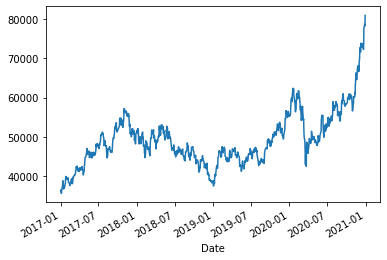

In [17]:
df['Close'].plot()

In [23]:
#aapl = df.loc[df['Market'] == 'AAPL']
#aapl

,Open,High,Low,Close,Volume,Change,Market
Date,,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665,AAPL
2017-01-03,36280,36620,36020,36480,147153,0.010526,AAPL
2017-01-04,36500,36520,36100,36160,159435,-0.008772,AAPL
2017-01-05,36060,36060,35540,35560,219349,-0.016593,AAPL
2017-01-06,36180,36440,36040,36200,177619,0.017998,AAPL
...,...,...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326,0.022130,AAPL
2020-12-24,74100,78800,74000,77800,32502870,0.052774,AAPL
2020-12-28,79000,80100,78200,78700,40085044,0.011568,AAPL


In [25]:
df = fdr.DataReader('AAPL','2017-01-01','2022-04-30')
df.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-01-03,29.04,28.95,29.08,28.69,115130000.0,0.0031
2017-01-04,29.00,28.96,29.13,28.94,84470000.0,-0.0014
2017-01-05,29.15,28.98,29.22,28.95,88770000.0,0.0052
2017-01-06,29.48,29.20,29.54,29.12,127010000.0,0.0113
2017-01-09,29.75,29.49,29.86,29.48,134250000.0,0.0092


In [26]:
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [27]:
df_krx['Sector'].head()

0           전자부품 제조업
1    산업용 기계 및 장비 임대업
2             기타 금융업
3             기타 금융업
4      특수 목적용 기계 제조업
Name: Sector, dtype: object

In [28]:
df_krx[['Symbol','Name']].head()

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [30]:
item_name = "삼성전자"
df_krx.loc[df_krx['Name'] == item_name, "Symbol"].tolist()[0]

'005930'

In [31]:
def item_code_by_item_name(item_name):
    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code
    else:
        return False

In [32]:
item_code_by_item_name('삼성전자')

'005930'

In [33]:
def find_item_list(item_name, year=2022):
  item_code = item_code_by_item_name(item_name)
  if item_code :
    df_day = fdr.DataReader(item_code, str(year))
    return df_day
  else:
    return False

In [34]:
find_item_list('삼성전자')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2022-04-29,65100,67600,65000,67400,26190390,0.040123
2022-05-02,66600,67600,66500,67300,14106184,-0.001484
2022-05-03,67400,68400,67300,67500,14168875,0.002972


In [35]:
find_item_list("삼성전자", 2021)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170
...,...,...,...,...,...,...
2022-04-29,65100,67600,65000,67400,26190390,0.040123
2022-05-02,66600,67600,66500,67300,14106184,-0.001484
2022-05-03,67400,68400,67300,67500,14168875,0.002972


In [36]:
stock_daily = find_item_list("삼성전자", 2017)
stock_daily

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998
...,...,...,...,...,...,...
2022-04-29,65100,67600,65000,67400,26190390,0.040123
2022-05-02,66600,67600,66500,67300,14106184,-0.001484
2022-05-03,67400,68400,67300,67500,14168875,0.002972


<AxesSubplot:xlabel='Date'>

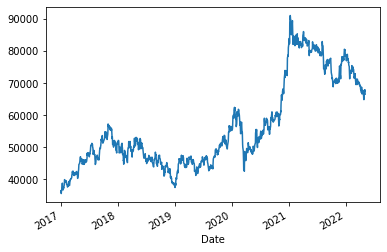

In [37]:
stock_daily['Close'].plot()

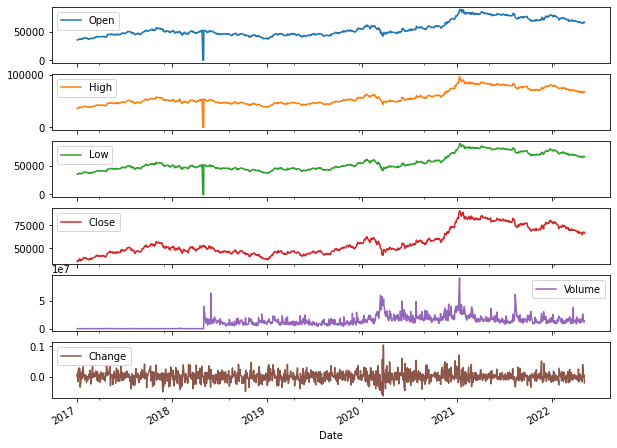

In [38]:
g = stock_daily.plot(subplots=True, figsize=(10,8))


In [39]:
stock_daily.describe()


,Open,High,Low,Close,Volume,Change
count,1313.000000,1313.000000,1313.000000,1313.000000,1.313000e+03,1313.000000
mean,56257.264280,56785.833968,55709.015232,56351.690784,1.214539e+07,0.000598
std,14148.725985,14237.174354,14041.954053,13854.185757,1.022058e+07,0.016214
min,0.000000,0.000000,0.000000,35560.000000,0.000000e+00,-0.063877
25%,46000.000000,46400.000000,45540.000000,46020.000000,4.717226e+06,-0.009027
50%,50900.000000,51420.000000,50400.000000,51020.000000,1.160329e+07,0.000000
75%,68700.000000,69500.000000,68500.000000,69000.000000,1.693072e+07,0.009837
max,90300.000000,96800.000000,89500.000000,91000.000000,9.030618e+07,0.104706


<AxesSubplot:xlabel='Date'>

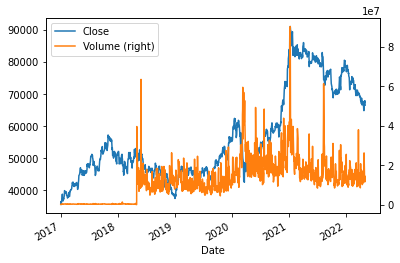

In [42]:
stock_daily[['Close','Volume']].plot(secondary_y = 'Volume')